In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
file = "../code/data/next_gen_exps.times"
df = pd.read_csv(file)
print(df)

                  inst       type  iter           alg      stage    time
0        girg10000.txt  construct     0        Dinics  construct    1984
1        girg10000.txt  construct     0     DinicsOPT  construct    1936
2        girg10000.txt  construct     0   PushRelabel  construct    5543
3        girg10000.txt  construct     0  BK-Algorithm  construct    1512
4        girg10000.txt        low     0        Dinics       init     330
...                ...        ...   ...           ...        ...     ...
1215  visualize-us.txt         gh     5  BK-Algorithm       flow  269001
1216  visualize-us.txt         gh     6  BK-Algorithm       flow  231509
1217  visualize-us.txt         gh     7  BK-Algorithm       flow  232769
1218  visualize-us.txt         gh     8  BK-Algorithm       flow  250098
1219  visualize-us.txt         gh     9  BK-Algorithm       flow  268007

[1220 rows x 6 columns]


# all times are in us (seconds * 1e-6)

girg10000.txt


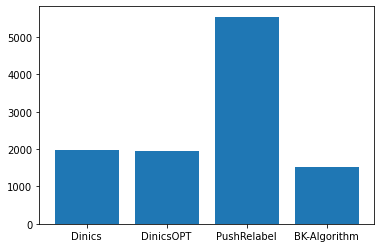

girg100000.txt


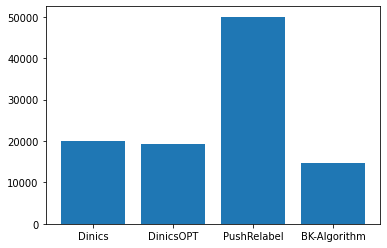

soc-flickr.txt


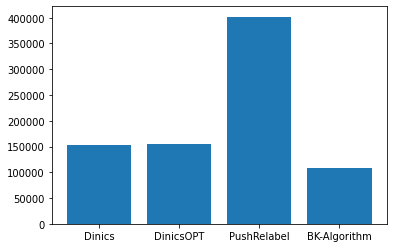

soc-slashdot.txt


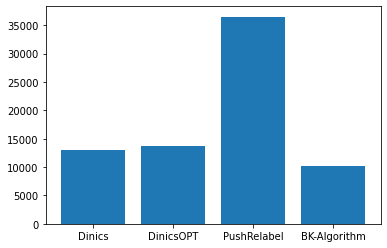

visualize-us.txt


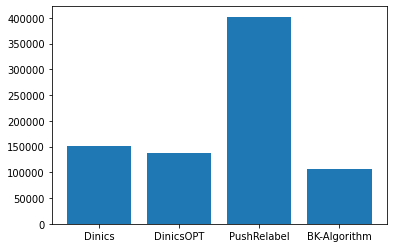

In [11]:
# times to construct res net
construct_df = df[df.type=='construct']
for inst, data in construct_df.groupby('inst'):
    plt.bar(data=data, x='alg', height='time')
    print(inst)
    plt.show()

girg10000.txt


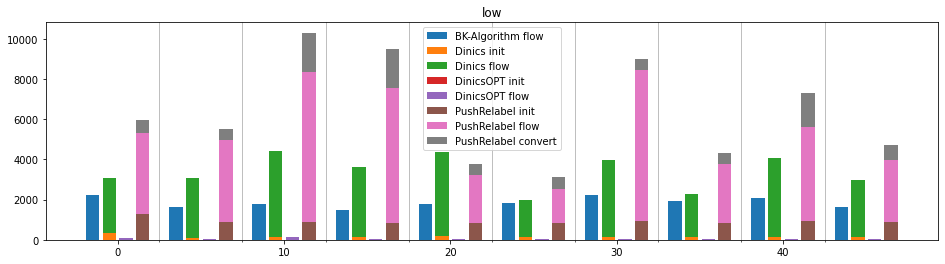

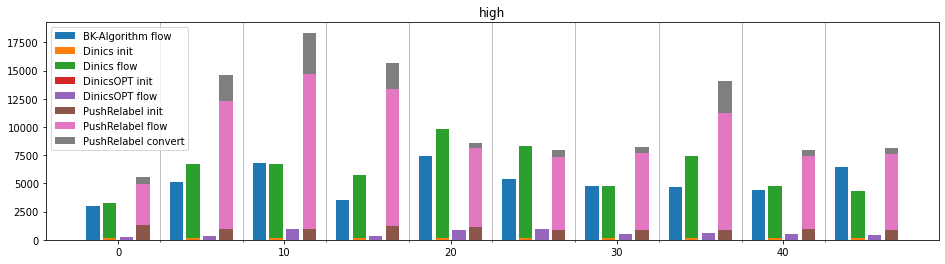

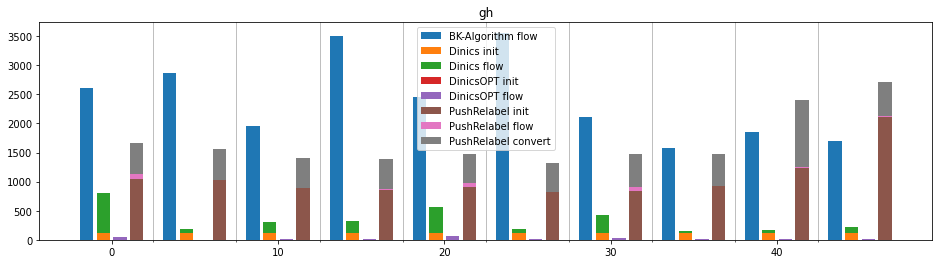

girg100000.txt


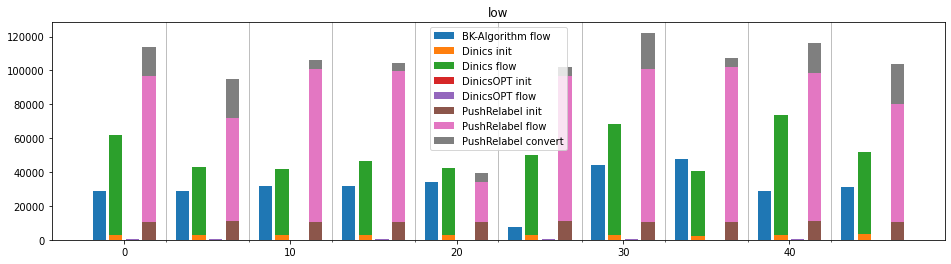

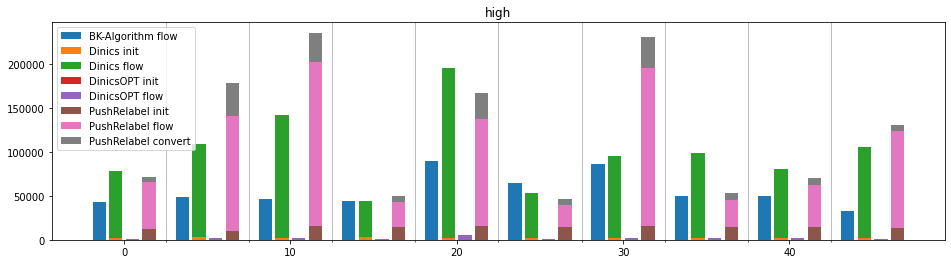

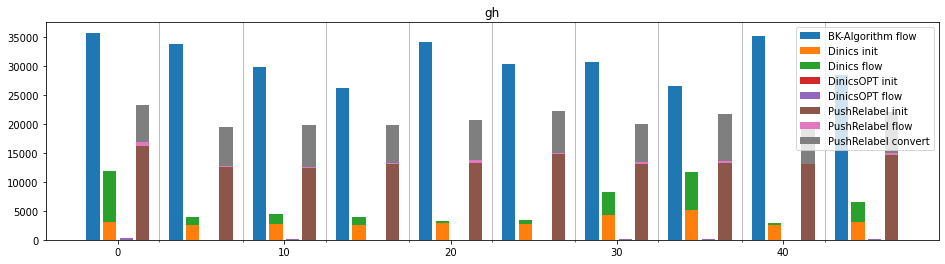

soc-flickr.txt


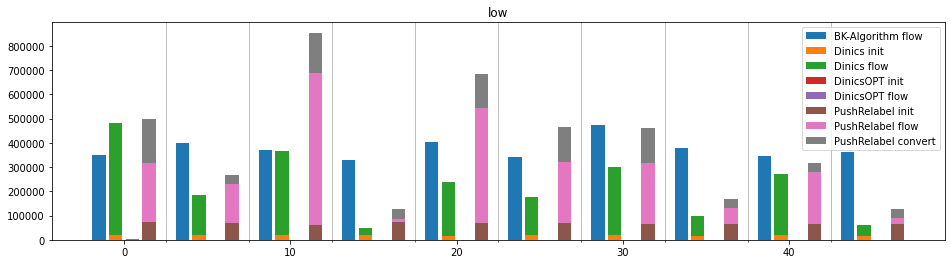

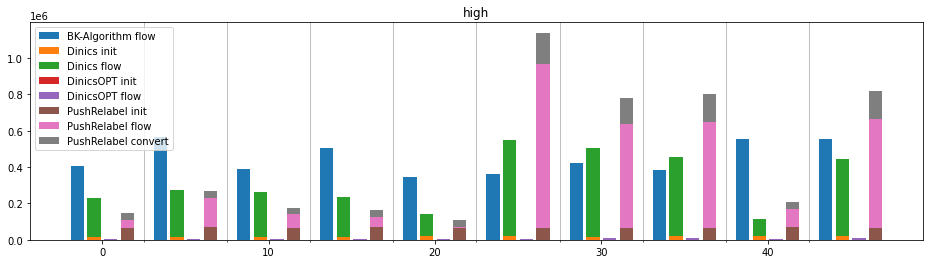

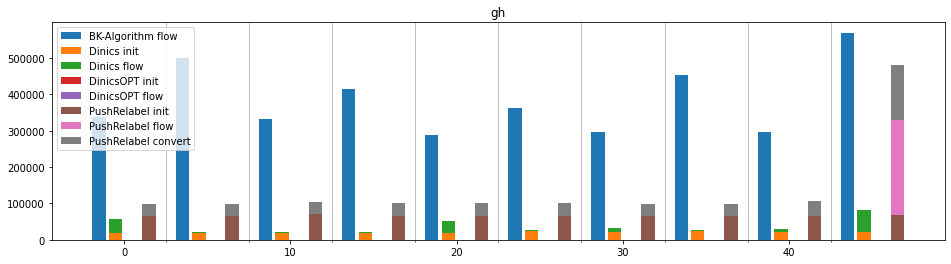

soc-slashdot.txt


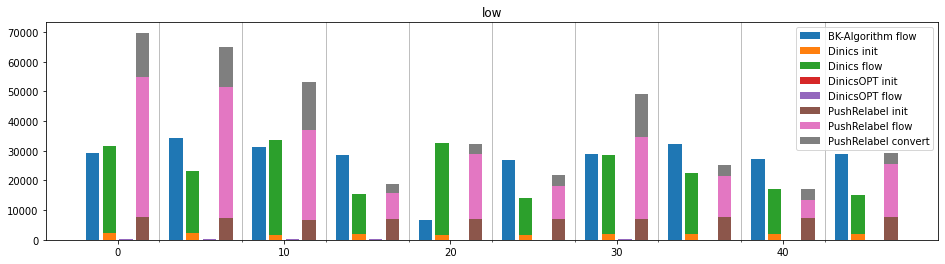

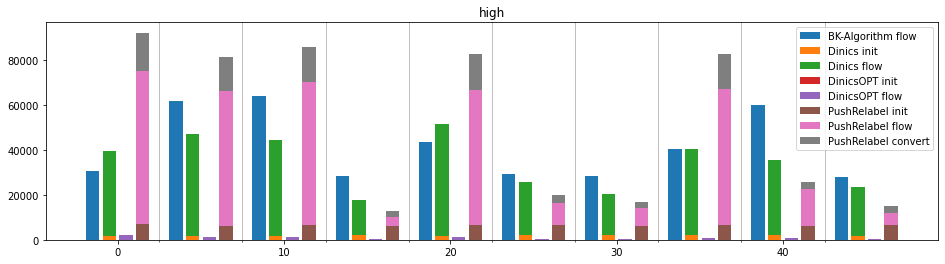

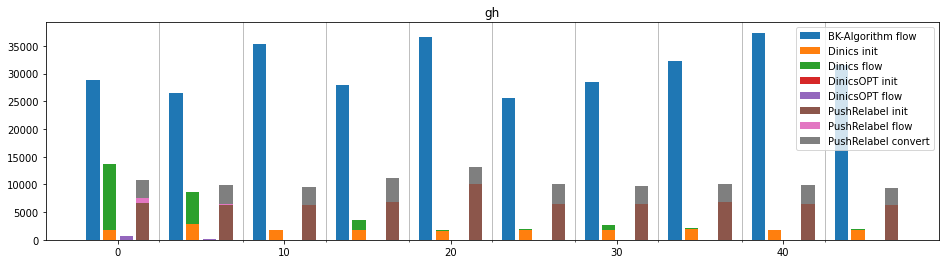

visualize-us.txt


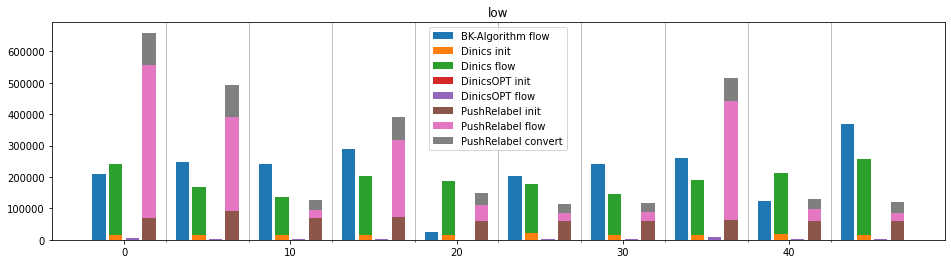

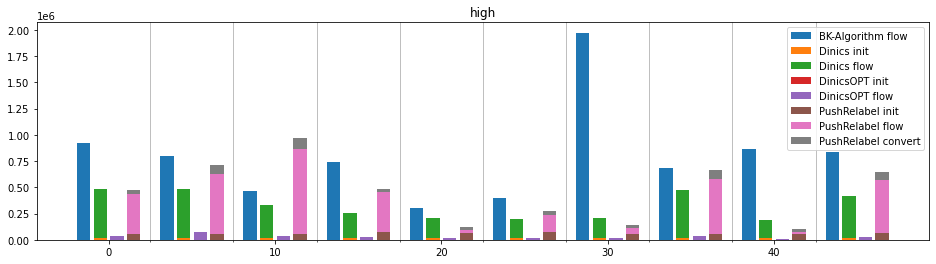

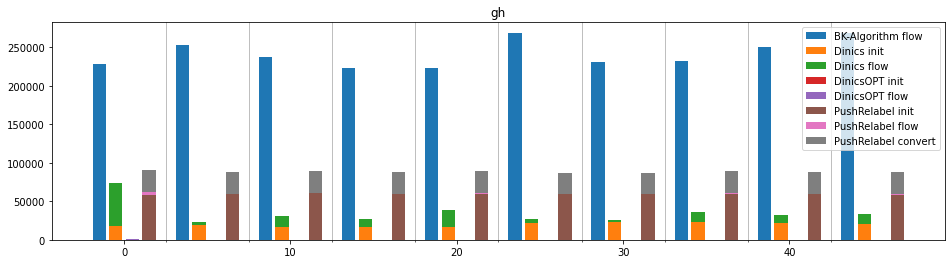

In [44]:
for inst, inst_data in df.groupby('inst'):
    print(inst)
    for typ in ['low','high','gh']:
        fig,ax = plt.subplots(figsize=(16,4))
        xoff = 0
        for alg, data in inst_data[inst_data.type==typ].groupby('alg'):
            yoff = [0]*(data.iter.max()+1)
            for stage in pd.unique(data.stage):
                ys = data[data.stage==stage].time
                xs = [i*5+xoff-1.5 for i in range(len(ys))]
                ax.bar(xs, ys, label=alg+' '+stage, bottom=yoff)
                i = 0
                for val in ys:
                    yoff[i] += val
                    i += 1
            xoff += 1

        ax.set_xticks([i*5+2.5 for i in range(9)], minor=True)
        ax.grid(which='minor', axis='x')
        ax.set_title(typ)

        plt.legend()
        plt.show()